Decision Tree

Tiatnic Survival Dataset

In [5]:
#Import the Necessary Libraries

import pandas as pd  # For data handling
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualization
from sklearn.model_selection import train_test_split  # To split data
from sklearn.tree import DecisionTreeClassifier  # Decision tree model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation

In [6]:
#Load the data sets- train and test 
train_data = pd.read_csv("train_titanic.csv")  
test_data = pd.read_csv("train_titanic.csv")   

print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Train Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

In [7]:
#Look at top values of train data 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#Print the column names of train data
train_data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [17]:
#Print the dimension of train and test data
print(train_data.shape)
print(test_data.shape)

(891, 12)
(891, 12)


In [22]:
#Print the number of missing values in each column of train and test data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

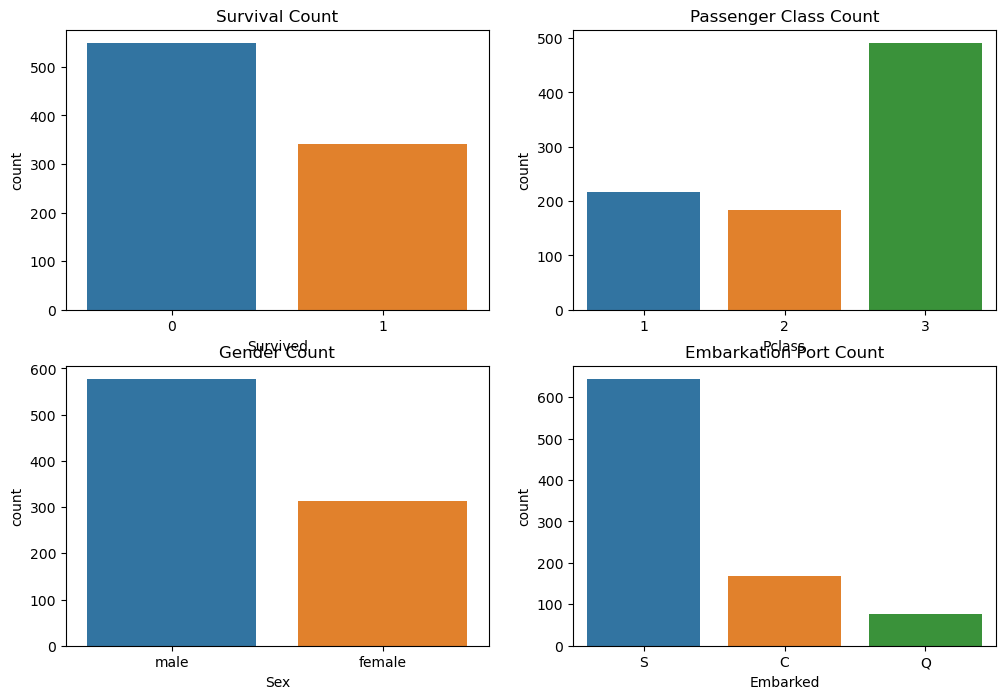

In [40]:
#Barchart of Survived, Pclass, Sex, Embarked
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x=train_data["Survived"])
plt.title("Survival Count")

plt.subplot(2, 2, 2)
sns.countplot(x=train_data["Pclass"])
plt.title("Passenger Class Count")

plt.subplot(2, 2, 3)
sns.countplot(x=train_data["Sex"])
plt.title("Gender Count")

plt.subplot(2, 2, 4)
sns.countplot(x=train_data["Embarked"])
plt.title("Embarkation Port Count")

#plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


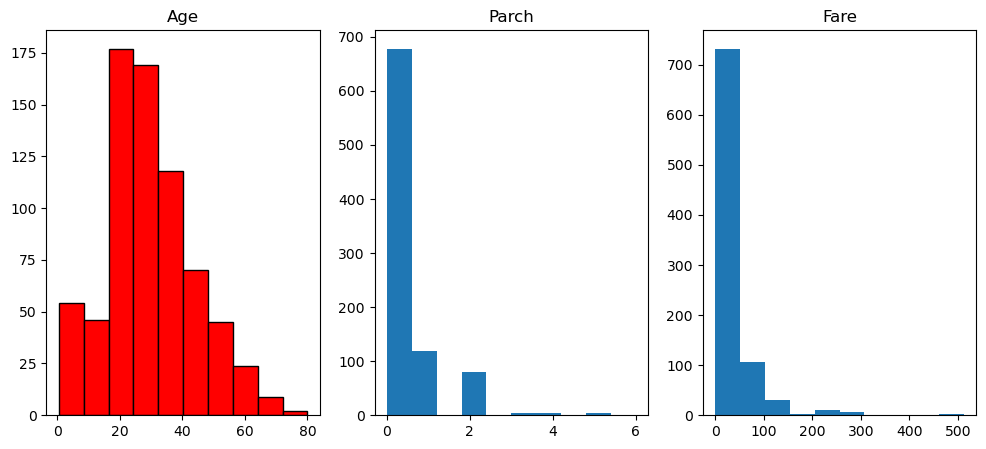

In [59]:
#Histogram of Age, Parch, Fare

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.hist(x=train_data['Age'].dropna(),bins=10,edgecolor='black',color='red')
plt.title("Age")

plt.subplot(1,3,2)
plt.hist(x=train_data['Parch'])
plt.title("Parch")

plt.subplot(1,3,3)
plt.hist(x=train_data['Fare'])
plt.title("Fare")

plt.show()

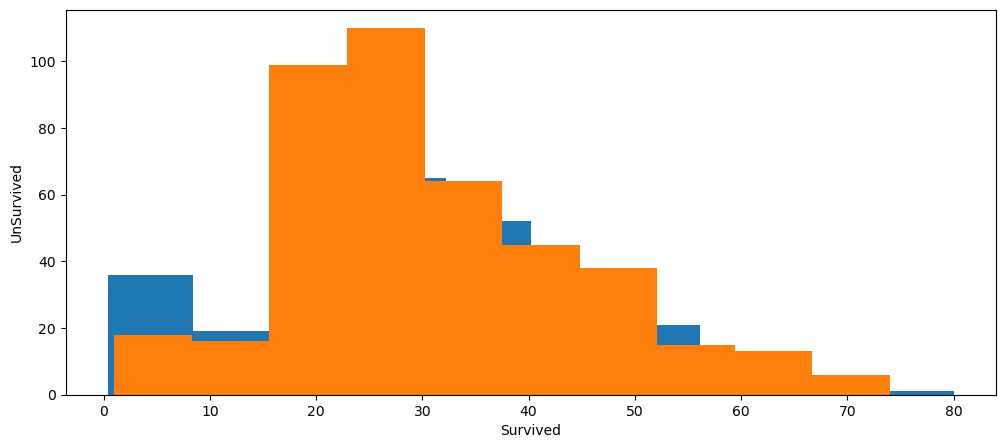

In [68]:
#Plot histogram of age for survived and did not survived class

plt.figure(figsize=(12,5))

plt.hist(train_data[train_data["Survived"]==1]['Age'].dropna(),label="survived")
plt.hist(train_data[train_data["Survived"]==0]['Age'].dropna(),label='unSurvived')

plt.xlabel("Survived")
plt.ylabel("UnSurvived")

plt.show()



/tmp/ipykernel_3663/3435358818.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[train_data["Sex"] == "male"]["Age"].dropna(), label="Male", shade=True, color="blue")
/tmp/ipykernel_3663/3435358818.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[train_data["Sex"] == "female"]["Age"].dropna(), label="Female", shade=True, color="pink")


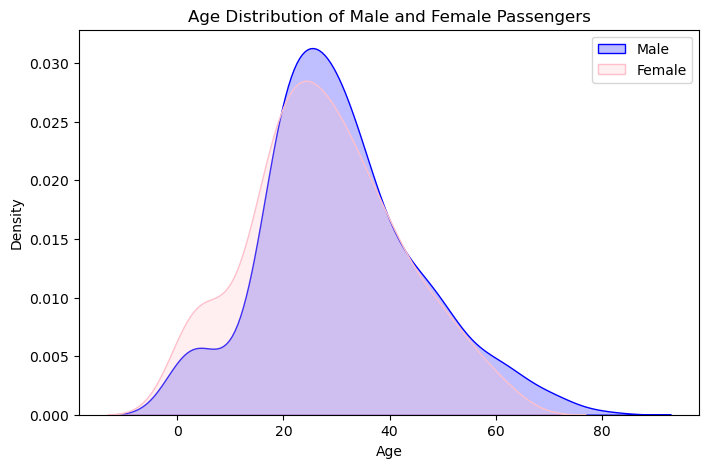

In [70]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
plt.figure(figsize=(8, 5))

# KDE plot for Male and Female Age Distribution
sns.kdeplot(train_data[train_data["Sex"] == "male"]["Age"].dropna(), label="Male", shade=True, color="blue")
sns.kdeplot(train_data[train_data["Sex"] == "female"]["Age"].dropna(), label="Female", shade=True, color="pink")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution of Male and Female Passengers")
plt.legend()

# Show plot
plt.show()


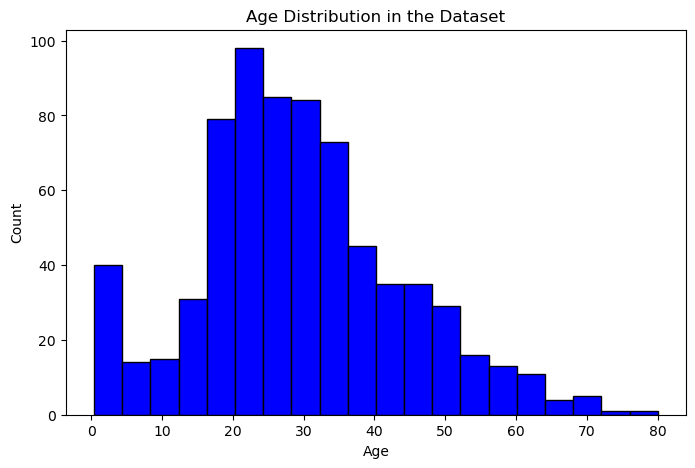

In [71]:
#Histogram of Age of the given data set(sample)
import matplotlib.pyplot as plt

# Plot histogram for Age
plt.figure(figsize=(8, 5))
plt.hist(train_data["Age"].dropna(), bins=20, color="blue", edgecolor="black")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution in the Dataset")

# Show plot
plt.show()

 

## Handling Missing Values

In [31]:
#Replace the msiing values in Embarked column by 'S'
train_data['Embarked'].fillna('S',inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
#Impute the missing values in Fare column with median value
# Replace missing values in the 'Fare' column with the median value

train_data["Fare"].fillna(train_data["Fare"].median(), inplace=True)
train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
import numpy as np

# Calculate mean and standard deviation of Age
mean_age = train_data["Age"].mean()
std_age = train_data["Age"].std()

# Count missing values in Age
num_missing = train_data["Age"].isnull().sum()

# Generate random values from a normal distribution with the same mean and std deviation
random_ages = np.random.normal(mean_age, std_age, num_missing)

# Replace missing Age values with the generated random values
train_data.loc[train_data["Age"].isnull(), "Age"] = random_ages


## Feature Engineering - Creating new features

In [39]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
# Create FamilySize feature
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,32.907432,1,2,W./C. 6607,23.4500,NaN,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,1


In [38]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
# Create IsAlone feature
train_data["IsAlone"] = train_data["FamilySize"] == 1

train_data["IsAlone"] = (train_data["FamilySize"] == 1).astype(int)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,32.907432,1,2,W./C. 6607,23.4500,NaN,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,1


## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [40]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
# Drop unnecessary columns
train_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.000000,1,0,7.2500,S,2,0
1,1,1,female,38.000000,1,0,71.2833,C,2,0
2,1,3,female,26.000000,0,0,7.9250,S,1,1
3,1,1,female,35.000000,1,0,53.1000,S,2,0
4,0,3,male,35.000000,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,1
887,1,1,female,19.000000,0,0,30.0000,S,1,1
888,0,3,female,32.907432,1,2,23.4500,S,4,0
889,1,1,male,26.000000,0,0,30.0000,C,1,1


## Model Building

In [45]:
#Prepare X and y
# Define target variable (y)
y = train_data["Survived"]

# Define feature variables (X) by dropping the target variable
X = train_data.drop(columns=["Survived"])
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.000000,1,0,7.2500,S,2,0
1,1,1,female,38.000000,1,0,71.2833,C,2,0
2,1,3,female,26.000000,0,0,7.9250,S,1,1
3,1,1,female,35.000000,1,0,53.1000,S,2,0
4,0,3,male,35.000000,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,1
887,1,1,female,19.000000,0,0,30.0000,S,1,1
888,0,3,female,32.907432,1,2,23.4500,S,4,0
889,1,1,male,26.000000,0,0,30.0000,C,1,1


In [55]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ["Sex", "Embarked"]

# Apply label encoding to each categorical column
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])
    print(X[col])


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64
0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64


In [57]:
# concat df_categorical with original df
# Concatenate df_categorical with X
X = pd.concat([X, df_categorical], axis=1)
X.drop(columns=["Sex", "Embarked"], inplace=True)  # Drop original categorical columns
X = pd.concat([X, df_categorical], axis=1)  # Concatenate encoded features


NameError: name 'df_categorical' is not defined

In [53]:
#Do a pairplot of all features
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairplot for all features
sns.pairplot(X)
plt.show()
sns.pairplot(X.sample(200))  # Use a smaller subset for faster visualization
plt.show()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [58]:
X

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Survived,Pclass,Age,...,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,22.000000,1,0,7.2500,2,0,0,3,22.000000,...,0,3,1,22.000000,1,0,7.2500,2,2,0
1,1,38.000000,1,0,71.2833,2,0,1,1,38.000000,...,1,1,0,38.000000,1,0,71.2833,0,2,0
2,3,26.000000,0,0,7.9250,1,1,1,3,26.000000,...,1,3,0,26.000000,0,0,7.9250,2,1,1
3,1,35.000000,1,0,53.1000,2,0,1,1,35.000000,...,1,1,0,35.000000,1,0,53.1000,2,2,0
4,3,35.000000,0,0,8.0500,1,1,0,3,35.000000,...,0,3,1,35.000000,0,0,8.0500,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,1,0,2,27.000000,...,0,2,1,27.000000,0,0,13.0000,2,1,1
887,1,19.000000,0,0,30.0000,1,1,1,1,19.000000,...,1,1,0,19.000000,0,0,30.0000,2,1,1
888,3,32.907432,1,2,23.4500,4,0,0,3,32.907432,...,0,3,0,32.907432,1,2,23.4500,2,4,0
889,1,26.000000,0,0,30.0000,1,1,1,1,26.000000,...,1,1,1,26.000000,0,0,30.0000,0,1,1


In [59]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
from sklearn.model_selection import train_test_split

# Split the dataset (90% train, 10% validation)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


In [60]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

DecisionTreeClassifier(random_state=42)


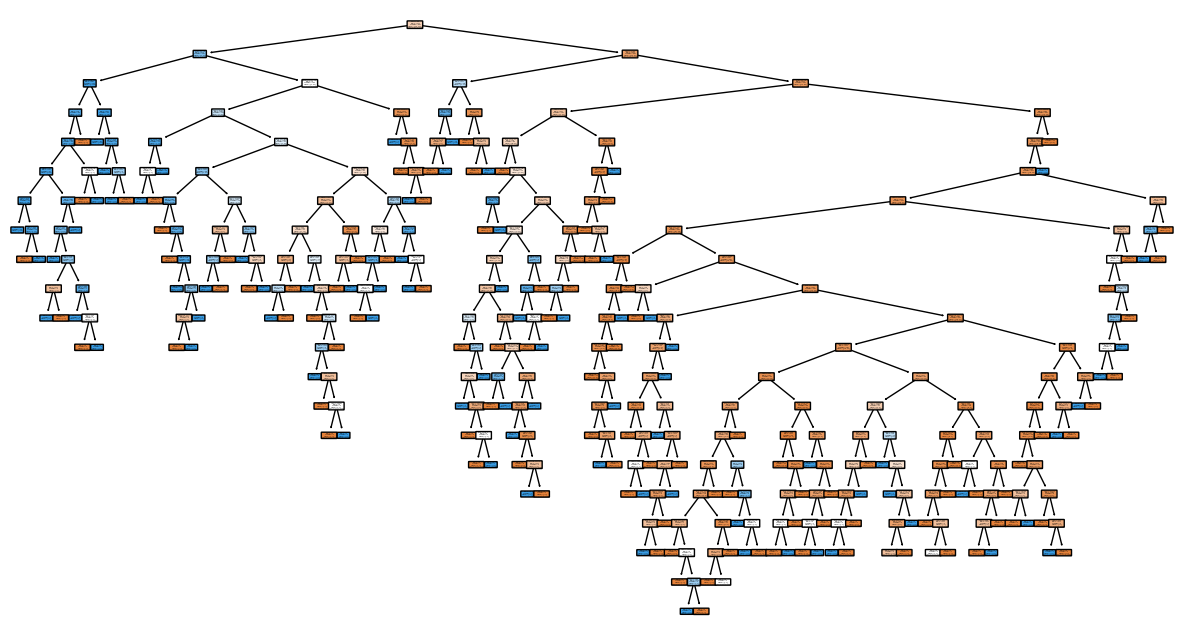

In [101]:
#Print the tree

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print(dt_model)


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Plot the decision tree
plot_tree(dt_model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, rounded=True)

plt.show()


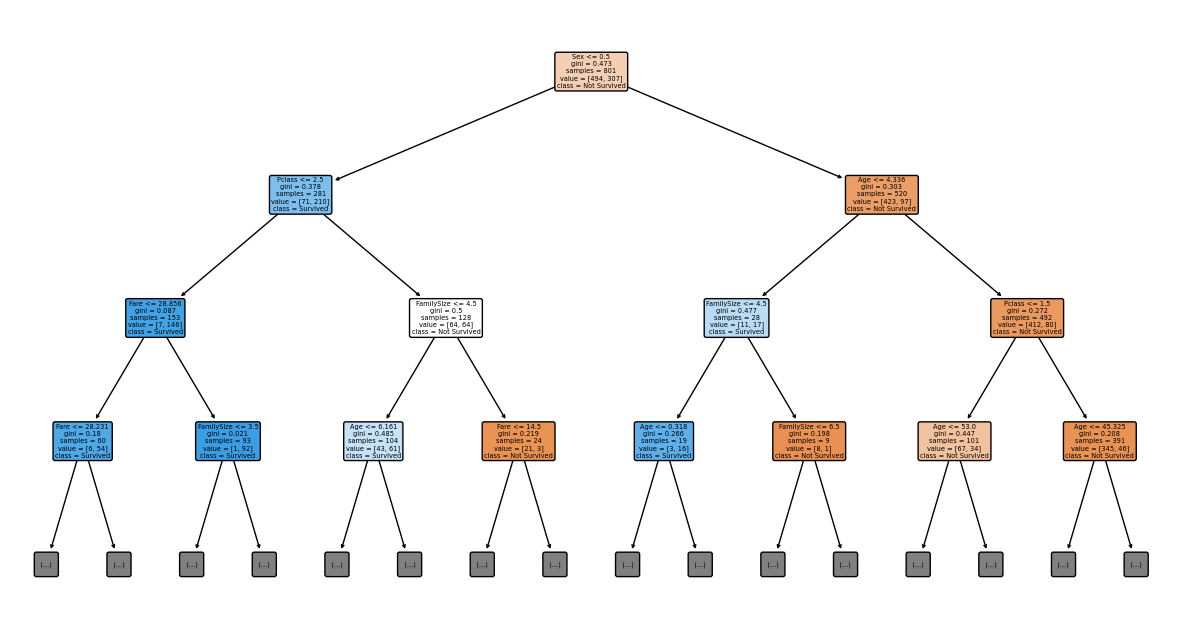

In [91]:
# plotting tree with max_depth=3
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(15, 8))

# Plot the decision tree with max_depth=3
plot_tree(dt_model, feature_names=X.columns, class_names=["Not Survived", "Survived"], 
          filled=True, rounded=True, max_depth=3)

# Show the plot
plt.show()


<img src="tree2.png">

In [92]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the validation set
y_pred = dt_model.predict(X_validation)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred)

# Compute accuracy, precision, recall, and F1-score
class_report = classification_report(y_validation, y_pred)

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy_score(y_validation, y_pred))
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[43 12]
 [ 8 27]]

Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        55
           1       0.69      0.77      0.73        35

    accuracy                           0.78        90
   macro avg       0.77      0.78      0.77        90
weighted avg       0.78      0.78      0.78        90



In [93]:
# Printing confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on validation data
y_pred = dt_model.predict(X_validation)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred)

# Compute accuracy
accuracy = accuracy_score(y_validation, y_pred)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)


Confusion Matrix:
 [[43 12]
 [ 8 27]]

Accuracy: 0.7777777777777778
